In [ ]:
# Import the libraries according to the needs.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv('Fish.csv') # Load the dataset 

In [ ]:
df # Examine the dataset
# To be honest at this point I am coding with an extension called data wrangler in vscode which helps in visualizing the dataframe , 
# its distribution , the missing values and the values in it without any further code . 
# You guys should definitely check it out . 

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df.info() # Analyze the dtypes and look for any anamolies 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df.describe() # Look at the 5 number summary and other statistical metrics.

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
df['Species'].unique() # Look at how many unique values are there for species so that we can accordingly choose the encoding method 

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

<Axes: xlabel='percent', ylabel='Species'>

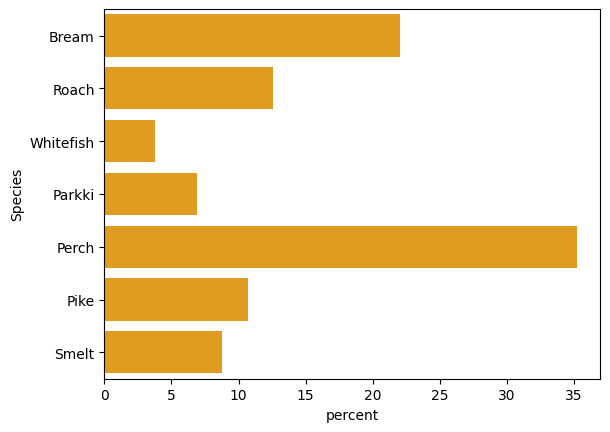

In [ ]:
sns.countplot(
            data = df, 
            y = df['Species'],
            color = 'orange', 
            stat = 'percent' # statistics = percent for better comparision
)
# Visualize the species using the countplot to look whether the data is balanced or not for species . 
# In our case the dataset is imbalanced and I have not done any other processing then the encoding for preprocessing . 
# We could have done more preprocessing but in this notebook , the main goal is to get an overall idea of the Decision tree and its visualization.

In [ ]:
from sklearn.preprocessing import LabelEncoder # Import the labelencoder , also we are always advised to use label libraries for label.

In [ ]:
le = LabelEncoder() # Encode after the train_test_split to avoid data leaks (In a normal work-flow).

In [ ]:
le.fit(df['Species']) # Fit the label column

LabelEncoder()

In [ ]:
df['Species'] = le.transform(df['Species']) # Replace the column with the new transformed column

In [ ]:
df.head() # Take a look at the changes 

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.info() # Check the dtypes of all the columns before passing the columns for further processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 8.8 KB


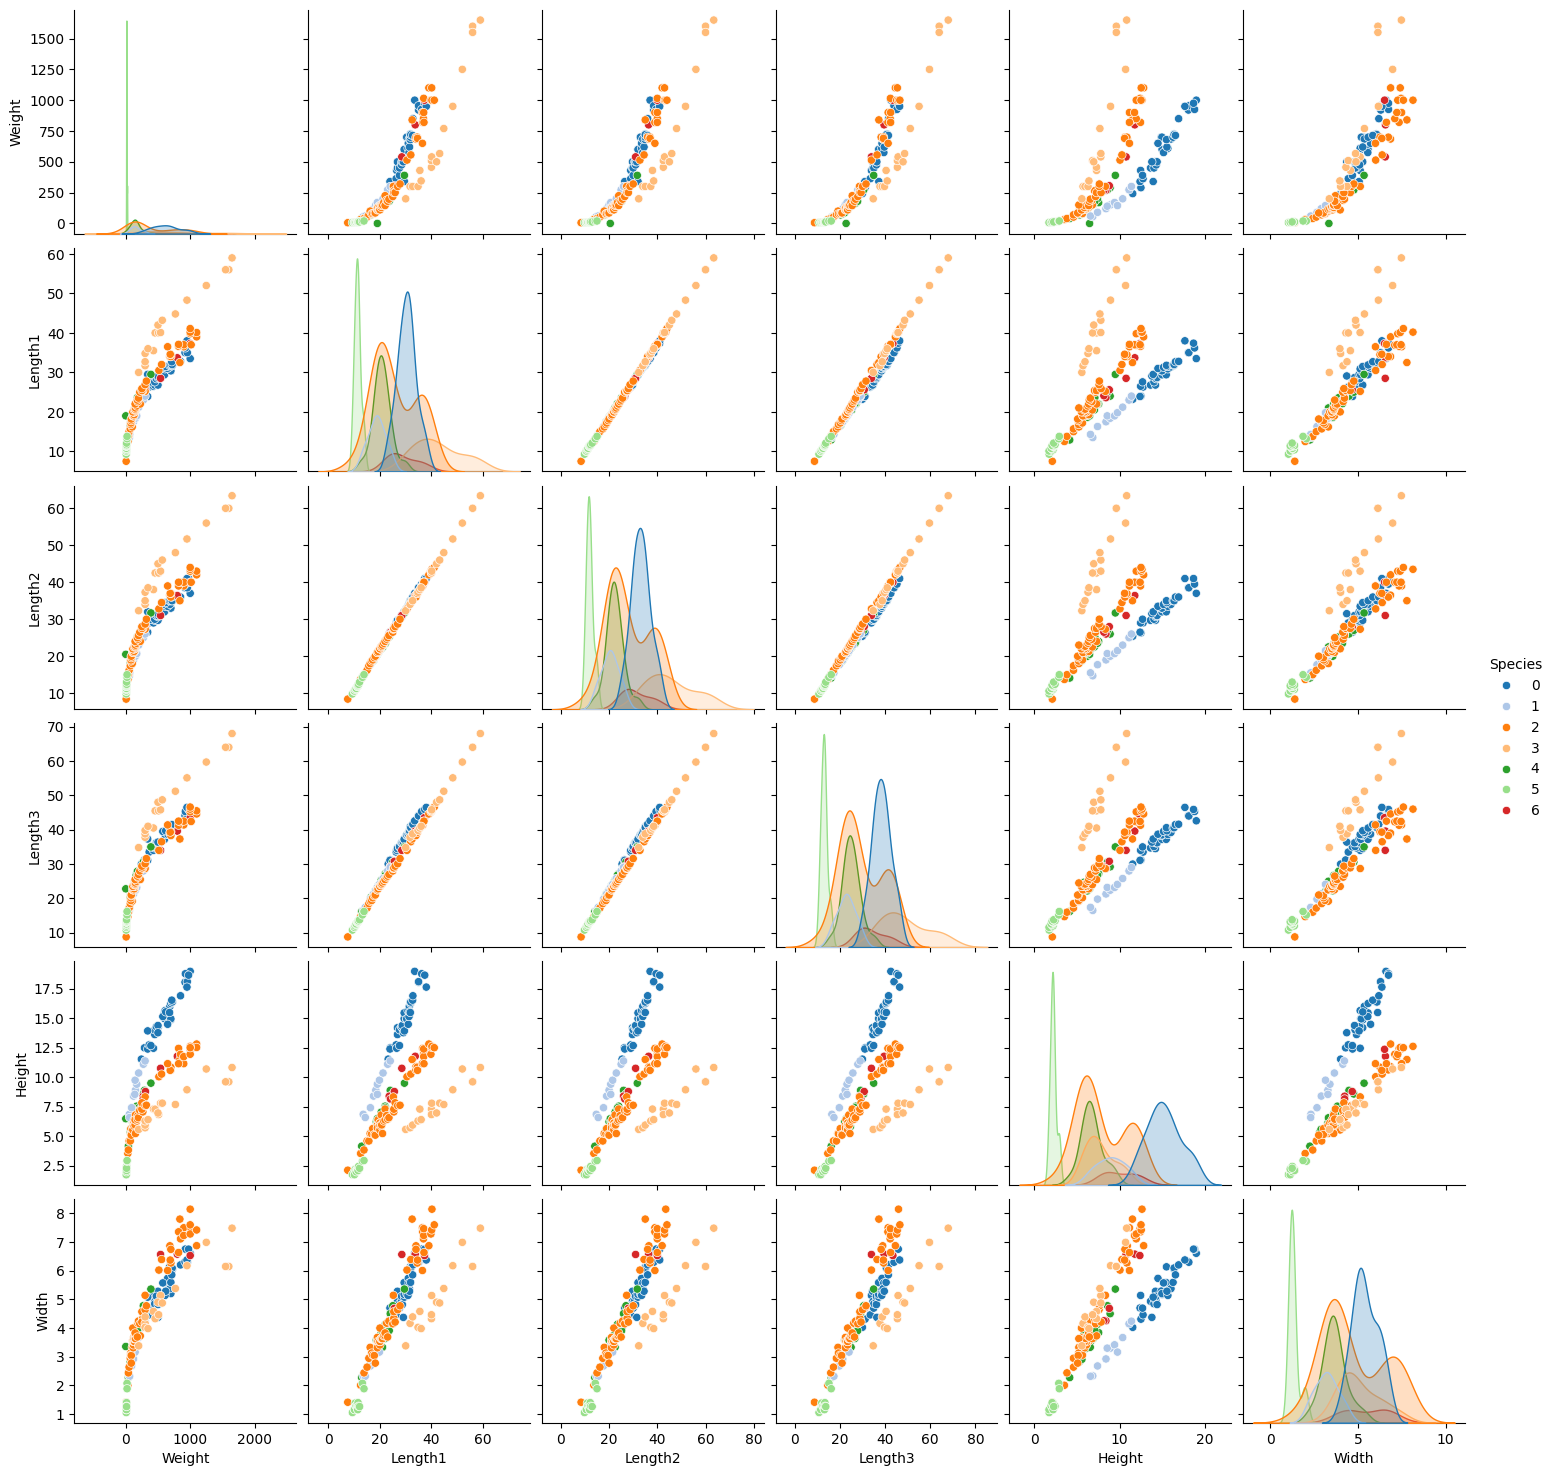

In [ ]:
# Get an overview of the data using hue = species.
sns.pairplot(
    data = df , 
    hue = 'Species',
    palette = 'tab20'
)

In [ ]:
# Split the data into features and labels
X = df.drop(columns = ['Species'])
y = df['Species']

In [ ]:
X # Examine X

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
y # Examine y

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

In [ ]:
# Split into training and testing set (When addressing real data this should be the first step before any processing).
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state = 42)

In [ ]:
# Import DecisionTreeClassifier from tree module
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instantiate the DecisionTreeClassifier model 
dtc = DecisionTreeClassifier(
    criterion = 'gini', # Gini is the default criterion which is computationaly less costly than entropy.
    class_weight='balanced' # As our classes are imbalanced we need this parameter to be passes to adjust the model.

)

In [ ]:
dtc.fit(X_train,y_train) # Fit the training set of the dataset

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [ ]:
y_pred_dtc = dtc.predict(X_test) # Make predictions and store in a variable

In [ ]:
# calculate the cross val score with scoring = balanced_accuracy with less folds as we have a small dataset.
cvs = cross_val_score(
                dtc, # The model to be passed
                X, # The features
                y, # The labels 
                cv = 5, # The no of folds
                scoring = 'balanced_accuracy' # The scoring strategy (there are other strategies also).
)

In [ ]:
# Calculate the mean and std of the above to evaluate 
print(f'The Balanced accuracy mean is {cvs.mean()}')
print(f'The Balanced accuracy std is {cvs.std()}')
# In this case the model is performing really bad so we will use hyper paremeter tuning using GridSearchCV

The Balanced accuracy mean is 0.5213358070500929
The Balanced accuracy std is 0.1434300823009026


In [57]:
print((classification_report(y_test,y_pred_dtc))) # Evaluate the classification report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       1.00      1.00      1.00         3
           2       0.77      0.71      0.74        14
           3       1.00      1.00      1.00         5
           4       0.29      0.50      0.36         4
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.79        48
   macro avg       0.71      0.73      0.72        48
weighted avg       0.79      0.79      0.79        48



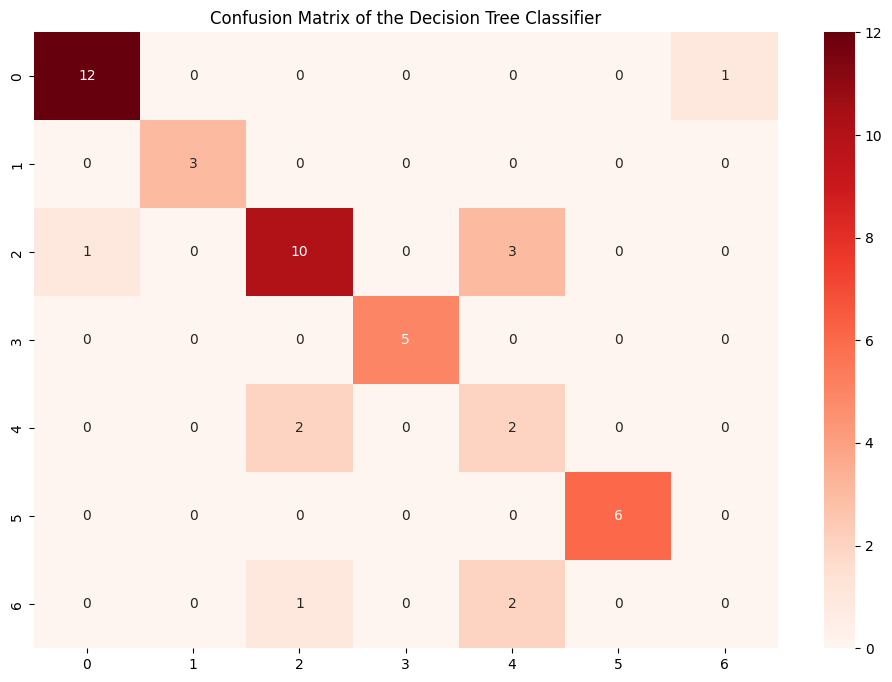

In [59]:
# Now below is the confusion matrix using the heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(
    data = pd.DataFrame(confusion_matrix(y_test,y_pred_dtc)),
    annot = True,
    cmap = 'Reds'
)
plt.title('Confusion Matrix of the Decision Tree Classifier')
plt.show()

In [ ]:
# Import the GridSearchCV from model_selection
from sklearn.model_selection import GridSearchCV

In [ ]:
# Make another instance of model and this will act as the base model to be passed to GridSearchCV
dtc1 = DecisionTreeClassifier(
    class_weight='balanced'
)

In [ ]:
# We make a dictionary of the param_grid so that we can feed it to GridSearchCV directly .
# The keys here are the parameters and values are the list of the values to be tested for .
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2,5,7,10,20,50,None],
    'min_samples_split'  : [2,3,5],
    'min_samples_leaf'  : [1,2,3,5,10]

}

In [ ]:
# Now we will make a GridSearchCV instantiation 
grid = GridSearchCV(
    dtc1, # pass the model for tuning
    param_grid = params, # pass the parameter grid
    cv = 5, # the number of folds same as cross_val_score
    scoring = 'balanced_accuracy' # scoring is set to this as our datastet is imbalanced 
)

In [ ]:
grid.fit(X,y) # Fit the grid with X and y
# When this is run the GridSearchCV searches for the best parameters and is set as best_estimator_.

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ht='balanced')
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy', ...], 'max_depth': [2, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time f

In [ ]:
grid.best_estimator_ # Returns the original passed model but fitted with best parameters

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",7
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",3
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [ ]:
grid.best_params_ # Returns the best parameters

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [ ]:
grid.best_score_ # Returns the best score using the strategy

np.float64(0.6373531230674088)

In [ ]:
dt2 = grid.best_estimator_ # Copied the best estimator into a new variable

In [ ]:
dt2.fit(X_train,y_train) # Fit this with the training set

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",7
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",3
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [ ]:
y_pred_dtc2 = dt2.predict(X_test) # Predict values

In [ ]:
#Verify the cross val score for balanced_accuracy for each species and its mean and std
cvs1 = cross_val_score(
    dt2,
    X,
    y,
    cv = 5,
    scoring ='balanced_accuracy'
)

In [36]:
print(f'The Balanced accuracy mean is {cvs1.mean()}')
print(f'The Balanced accuracy std is {cvs1.std()}') 

The Balanced accuracy mean is 0.6113790970933828
The Balanced accuracy std is 0.17306864353630297


In [ ]:
print((classification_report(y_test,y_pred_dtc2))) # Also evaluate the classification report
# Looking at this our model has impoved a lot from previous model

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       1.00      1.00      1.00         3
           2       0.71      0.36      0.48        14
           3       1.00      1.00      1.00         5
           4       0.23      0.75      0.35         4
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         3

    accuracy                           0.71        48
   macro avg       0.70      0.72      0.68        48
weighted avg       0.77      0.71      0.71        48



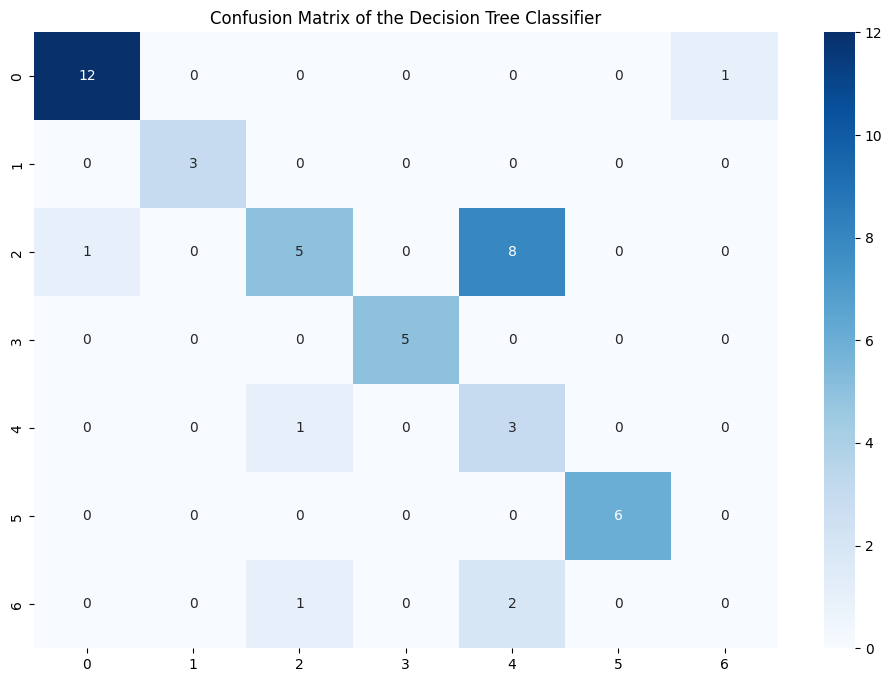

In [ ]:
# Now below is the confusion matrix using the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    data = pd.DataFrame(confusion_matrix(y_test,y_pred_dtc2)),
    annot = True,
    cmap = 'Blues'
)
plt.title('Confusion Matrix of the Decision Tree Classifier')
plt.show()

In [ ]:

from sklearn.tree import plot_tree

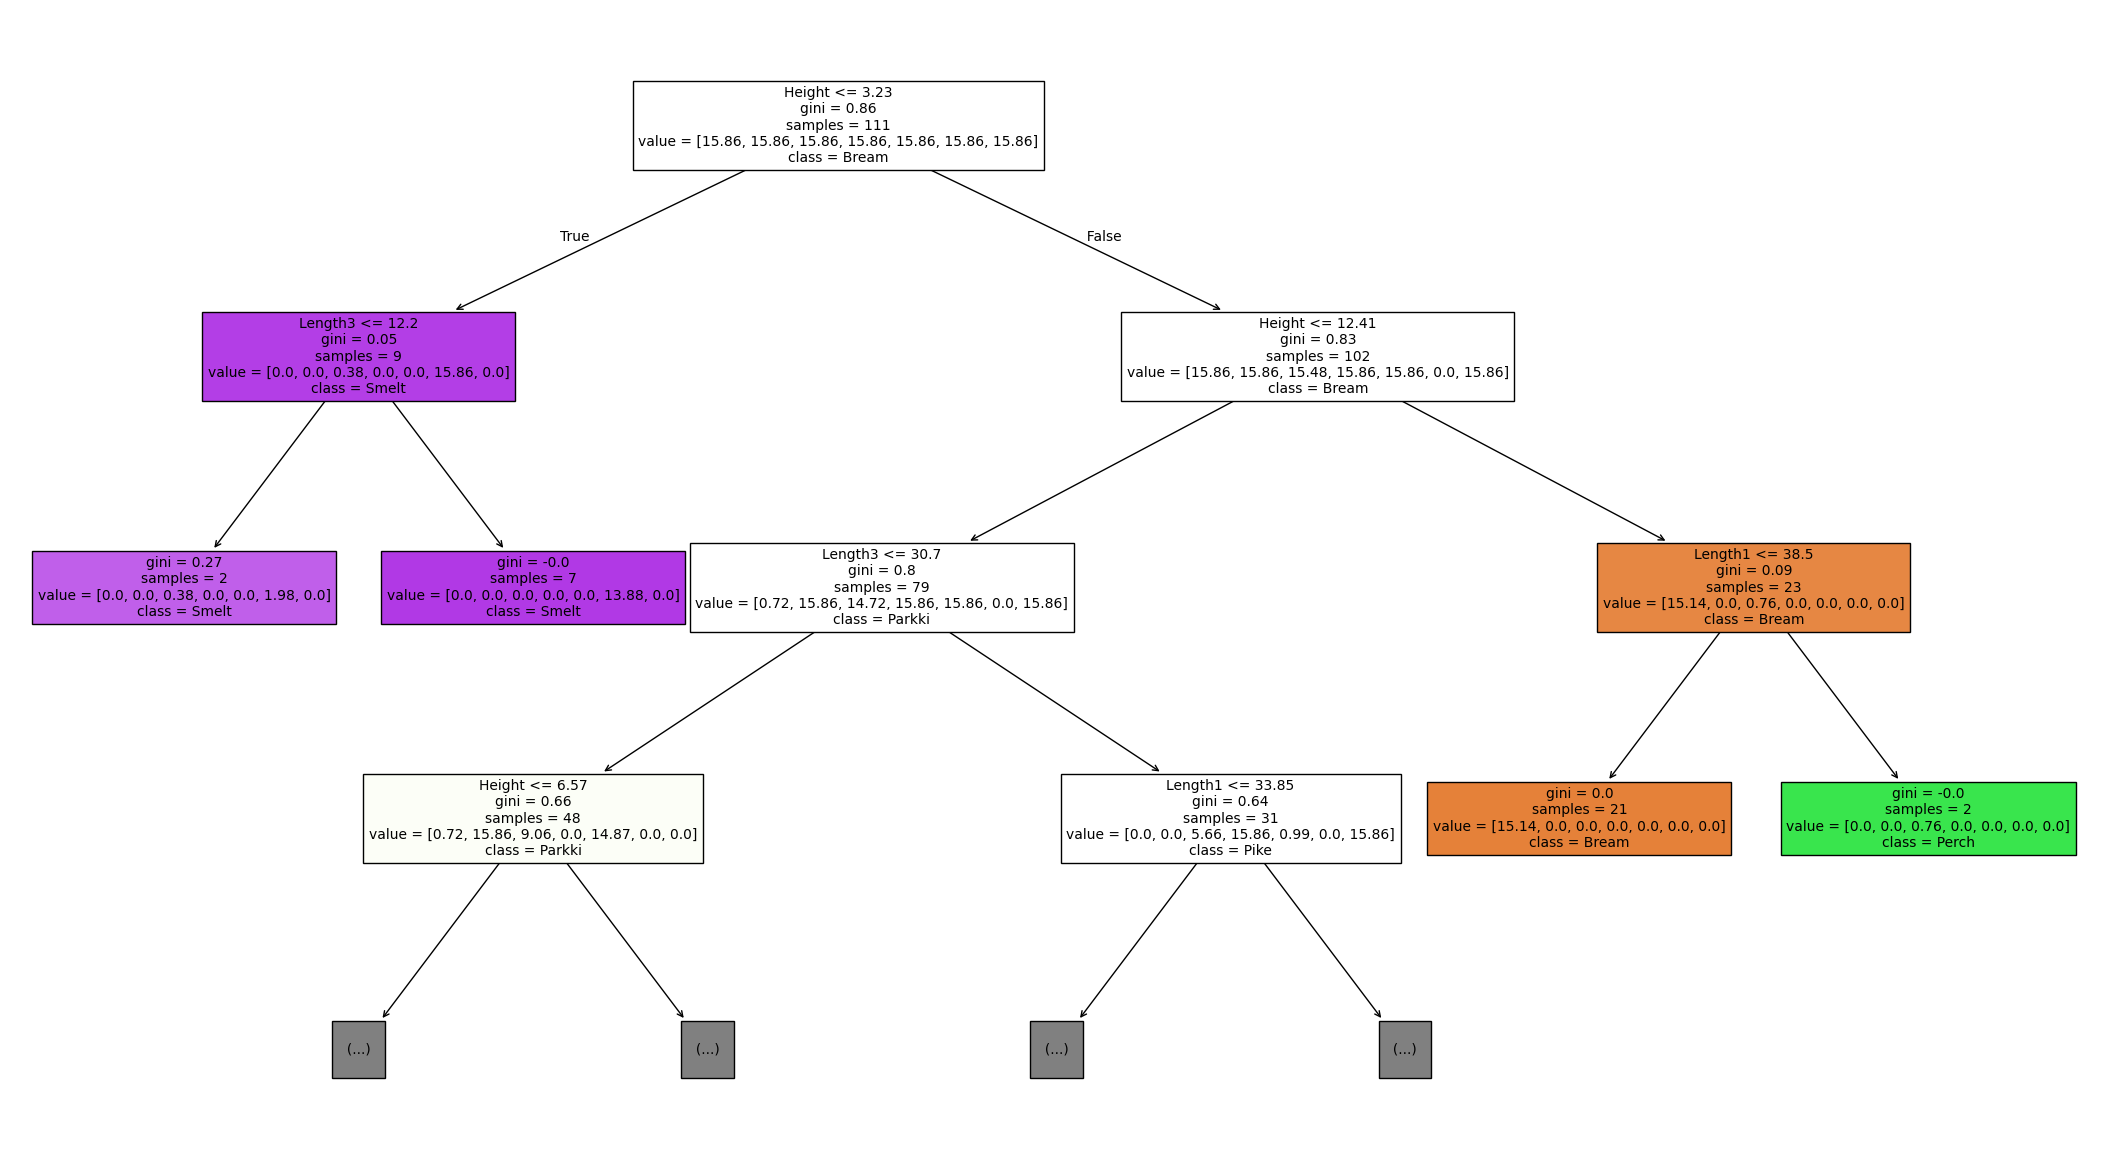

In [40]:
plt.figure(figsize=(27,15))
plot_tree(
    dt2,
    feature_names = list(X.columns),
    class_names=le.classes_,
    filled = True,
    fontsize = 10,
    max_depth = 3,
    precision = 2
)
plt.show()

In [41]:
import dtreeviz 
# NOTE :  Also Make sure you have graphviz also installed and the graphiz .exe file for your system added to all system paths on your device.

In [ ]:
viz_model = dtreeviz.model(
    grid.best_estimator_,         # Your optimized model
    X_train=X_train,              # Features (matching labels)
    y_train=y_train,      # Integer labels (0, 1, 2...)
    target_name="Species",
    feature_names=list(X.columns),
    class_names=list(le.classes_) # Human-readable fish names
)


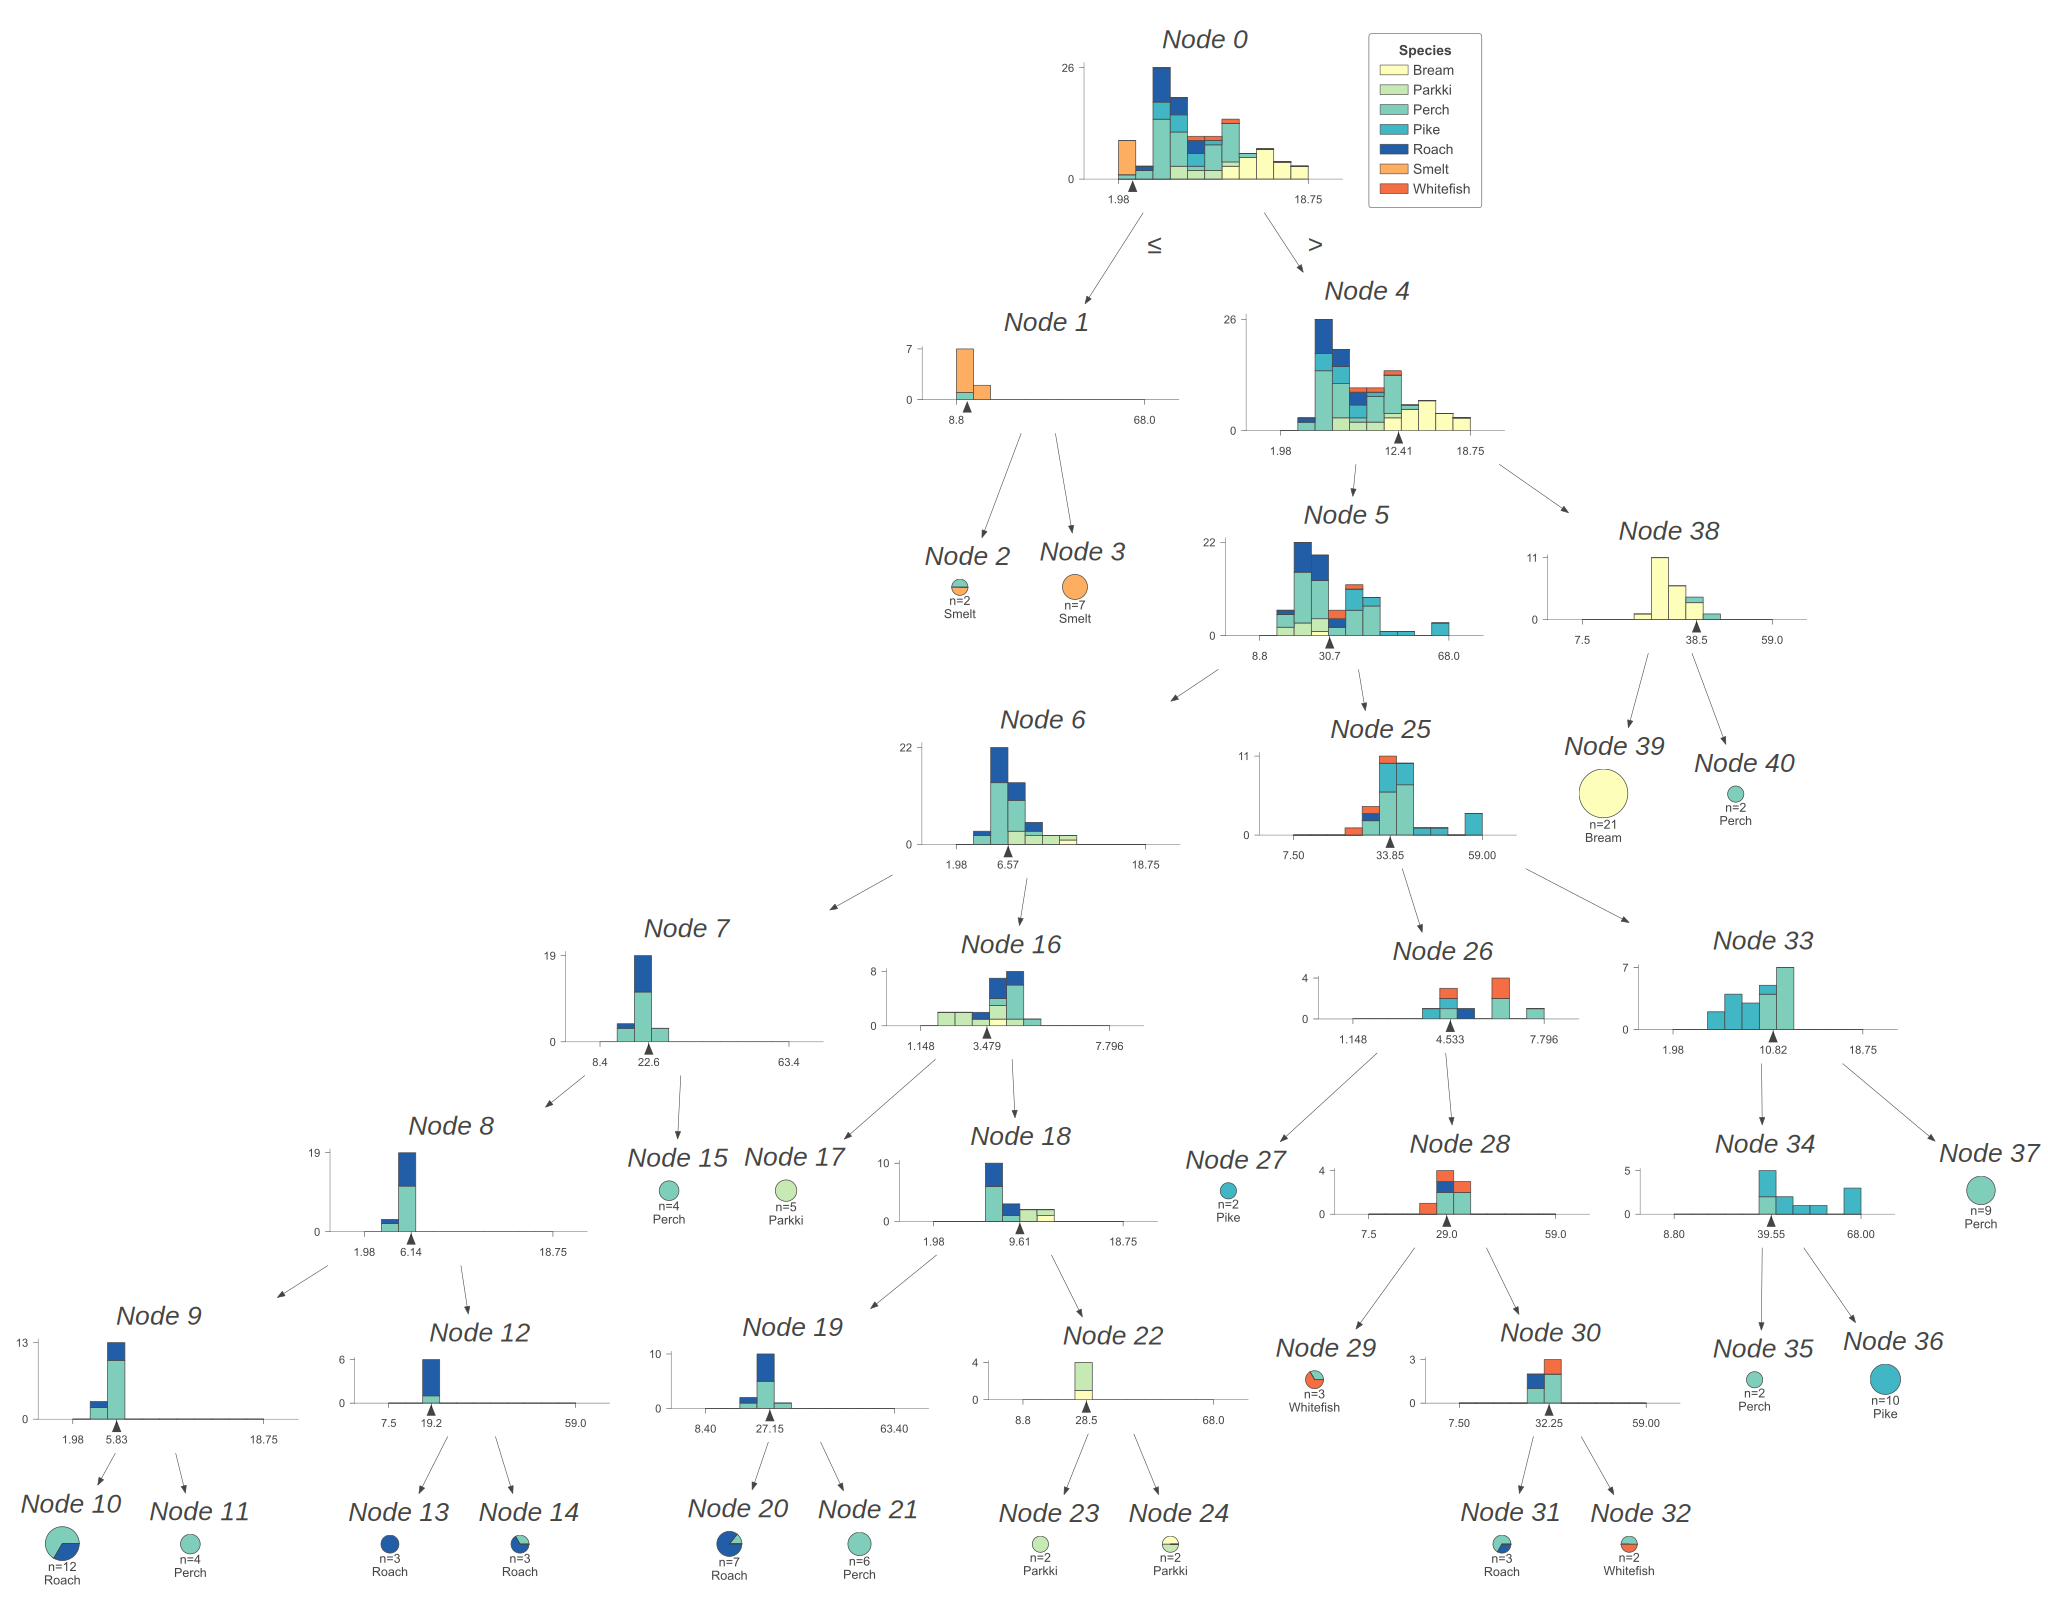

In [55]:
viz_model.view(
    scale = 2,
    orientation = 'TB',
    # fancy = False, # Use this when we just want to look at leafs and the split condition
    label_fontsize=10,
    fontname="Arial",        # Cleaner font for high-res displays
    show_node_labels=True,
) # .show for opening in browser 
# Also if the graph is too big open in browser or expand image using plots in vscode (or any other ide).